0. Данные, которые не могут быть обработаны

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from datetime import datetime


filename = "C:\\Course\\Task_9\\user_actions.csv"

data = pd.read_csv(filename)
data['createdDateTime'] = pd.to_datetime(data['createdDateTime'])

grouped_data = data.groupby(['actionId'])

missing_data_count = 0

for message in grouped_data['message']:
    if not ('[END]' in str(message) and '[START]' in str(message)):
        missing_data_count+=1

print('Missing data: {}'.format(missing_data_count))

Missing data: 935


1. Процентное соотношение операций (круговая диаграмма)

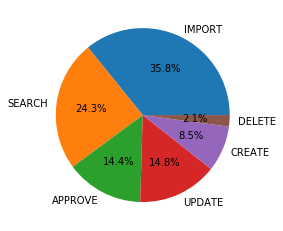

In [66]:
operations_counter = Counter()

for message in data['message']:
    operations_counter[message.split(']')[1].split('[')[1]]+=1
    
operations_sum = 0
    
for operation in operations_counter:
    operations_sum += operations_counter[operation]

plt.pie(operations_counter.values(), labels=operations_counter.keys(), autopct='%1.1f%%')
plt.show()

2. Общее количество операций по неделям

In [67]:
weekly_operations_counter = Counter()

for date in data['createdDateTime']:
    weekly_operations_counter[date.week]+=1
    
for week in weekly_operations_counter:
    print('Week: {0}, operations count: {1}'.format(week, weekly_operations_counter[week]))

Week: 40, operations count: 386
Week: 43, operations count: 352
Week: 23, operations count: 393
Week: 14, operations count: 386
Week: 6, operations count: 323
Week: 8, operations count: 405
Week: 3, operations count: 371
Week: 2, operations count: 345
Week: 4, operations count: 369
Week: 22, operations count: 388
Week: 50, operations count: 360
Week: 39, operations count: 386
Week: 25, operations count: 344
Week: 44, operations count: 333
Week: 37, operations count: 337
Week: 32, operations count: 345
Week: 26, operations count: 338
Week: 28, operations count: 362
Week: 12, operations count: 331
Week: 49, operations count: 431
Week: 34, operations count: 346
Week: 45, operations count: 357
Week: 33, operations count: 327
Week: 7, operations count: 371
Week: 10, operations count: 361
Week: 20, operations count: 359
Week: 16, operations count: 373
Week: 11, operations count: 365
Week: 18, operations count: 388
Week: 48, operations count: 391
Week: 46, operations count: 374
Week: 13, oper

3. Для операций поиска - топ-10 наиболее длительных операций с указанием затраченного времени

In [70]:
search_operations_id_list = []

for line in grouped_data:
    if 'SEARCH' in str(line[1].message.values) \
    and '[END]' in str(line[1].message.values) \
    and '[START]' in str(line[1].message.values):
        search_operations_id_list.append(line[0])

search_operations_duration_dict = {operation_id: [] for operation_id in search_operations_id_list}

for line in grouped_data:
    if line[0] in search_operations_id_list:
        search_operations_duration_dict[line[0]] = \
        pd.Timedelta(abs(line[1].createdDateTime.values[0] - line[1].createdDateTime.values[1]))

countTopTen = 0
for key, item in sorted(search_operations_duration_dict.items(), key=lambda item: item[1], reverse = True):
    if countTopTen < 10:
        print(key, item)
        countTopTen+=1

9e63c4d8-2764-465e-ab8a-83446f94240e 0 days 00:16:23
5497fc04-9b2e-4a92-a947-0b45511b3f73 0 days 00:16:20
8e39d016-95b4-4008-82e3-bd42a9ae2c36 0 days 00:16:19
175c84ff-51ba-487b-90f9-89f9cc429b51 0 days 00:16:16
1b8aa553-979c-47ec-80aa-c4622140b3ef 0 days 00:15:55
59b622bb-7e9b-4219-9bc3-1f262af0d1c6 0 days 00:15:54
79c1f320-41e7-4b5a-bf8a-bf266b5e0f53 0 days 00:15:42
6b89eb63-b998-4cc7-8cf4-b7cfea678171 0 days 00:15:36
21248776-e024-431d-ae54-8aab2fc85a53 0 days 00:15:34
21d24895-dcf7-4d77-a95a-8fa4bbe6b21a 0 days 00:15:33


4. Для остальных операций:

а) Гистограмма входных данных по каждой операции 

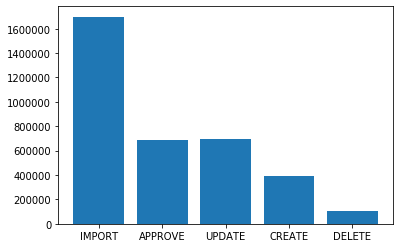

In [71]:
operations_input_data_counter = Counter()

for message in data['message']:
    if 'num_records' in message:
        operations_input_data_counter[message.split(']')[1].split('[')[1]]+= \
        int(message.split('num_records=')[1].split(']')[0])

plt.bar(operations_input_data_counter.keys(), operations_input_data_counter.values())
plt.show()

б) Диаграмма результатов - отобразить на графике количество успешных, 
условно успешных (warning) и неуспешных результатов.

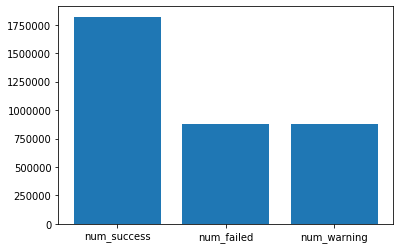

In [72]:
operations_success_data_counter = Counter()

for message in data['message']:
    if 'num_success' in message:
        operations_success_data_counter['num_success']+=int(message.split('num_success=')[1].split(',')[0])
    if 'num_failed' in message:
        operations_success_data_counter['num_failed']+=int(message.split('num_failed=')[1].split(',')[0])
    if 'num_warning' in message:
        operations_success_data_counter['num_warning']+=int(message.split('num_warning=')[1].split(']')[0])

plt.bar(operations_success_data_counter.keys(), operations_success_data_counter.values())
plt.show()

в) Зависимость затраченного времени от количества входных данных (диаграмма рассеяния)

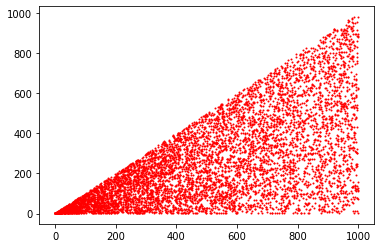

In [73]:
operations_id_list = []

for line in grouped_data:
    if '[END]' in str(line[1].message.values) \
    and '[START]' in str(line[1].message.values) \
    and 'num_records' in str(line[1].message):
        operations_id_list.append(line[0])
        
operations_duration_dict = {operation_id: [] for operation_id in operations_id_list}
operations_correct_input_data_counter = Counter()
        
for line in grouped_data:
    if line[0] in operations_id_list:
        operations_duration_dict[line[0]] = \
        pd.Timedelta(abs(line[1].createdDateTime.values[0] - line[1].createdDateTime.values[1]))
        operations_correct_input_data_counter[line[0]] += \
        int(str(line[1].message).split('num_records=')[1].split(']')[0])       
        
operations_info = {operation_id: \
                   [operations_correct_input_data_counter[operation_id], operations_duration_dict[operation_id]] \
                   for operation_id in operations_id_list} 

for key, value in operations_info.items():
    plt.scatter(value[0], value[1].seconds, color='r', s=1)
    
plt.show()